### A prototyping notebook for quickly testing and troubleshooting new functions or issues

#### Imports

In [20]:
import src.api_call as ac
import pandas as pd
import src.text_process as tp
from sklearn.model_selection import train_test_split
import src.bert_model as bm
import src.model_evaluation as me
from pathlib import Path
import tensorflow as tf
import tensorflow_text as tf_text
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics import confusion_matrix

#### API test section

In [2]:
# Change to true if testing API code
testing_api = False
if testing_api:
    ''' include API test code here'''

else:
    # Default to locally saved text data
    print ('Using local test files')
    test_set = {
    'Blockchain':0,
    'Cryptocurrency':1, 
    'Genetic engineering':2, 
    'Machine learning':3, 
    'Nanotechnology':4, 
    'Quantum computing':5, 
    'Robotics':6, 
    'Social engineering':7, 
    'Space exploration':8, 
    'Virtual reality':9
    }
    


Using local test files


#### Text processing

In [3]:
# Change to true if testing text processing
testing_text_process = False

if testing_text_process:
    '''text processing tests here'''
else:
    # Default to saved preprocessed text used in control model
    all_text = pd.read_csv('control/sample_data/clean_data.csv')

#### Model building

In [4]:
testing_model = False

#define train/test split
x_train,x_test,y_train,y_test = train_test_split(all_text['Text'],all_text['Code'])

if testing_model:

    #placeholder for initial tensor
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

    #generate the bert encodings
    preprocessed_text = bert_preprocess_model(text_input)
    outputs = bert_encoder(preprocessed_text)
else:
    # Default to the pretrained/saved model used in control model
    model = tf.keras.models.load_model('control/model')
    print ('model loaded')


model loaded


#### Evaluation

In [5]:
# generate predictions using x_test
predictions = model.predict(x_test)


<AxesSubplot:>

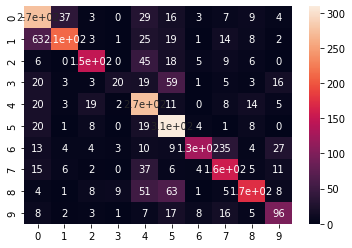

In [24]:
testing_evaluation = True

if testing_evaluation:
    results = me.results(predictions, y_test)
    cm1 = me.confusion_matrix(results)
    cm2 = confusion_matrix(y_pred=results['P'], y_true=results['A'])



else:
    pass
sns.heatmap(cm1, annot=True)